In [231]:
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
data = pd.read_csv('data/CitieSHealth_BCN_DATA_PanelStudy_20220414_Clean.csv')
data

,no2,pm25,black carbon,performance,occurrence_mental,wellbeing,stress,sleep quality,gender,diet,alcohol,drug_use,education,access_greenbluespaces,smoke,age
0,28.54,8.16,0.50,51.24,2,8,5,8,Female,Yes,No,No,university,Yes,No,37
1,44.51,13.38,1.51,56.01,10,9,8,9,Female,Yes,Yes,No,university,Yes,Yes,28
2,33.81,16.53,1.17,58.18,14,3,5,2,Female,Yes,No,No,university,Yes,No,29
3,37.86,15.67,1.21,71.48,12,9,6,2,Female,No,Yes,No,university,Yes,No,33
4,37.82,18.45,1.56,46.05,9,3,5,10,Female,Yes,Yes,No,baccalaureate,No,No,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,33.99,13.17,1.19,61.69,13,7,2,8,Female,No,No,No,university,No,Yes,31
2212,49.05,21.90,1.78,29.86,1,8,10,7,Female,No,Yes,No,university,Yes,No,39
2213,17.82,11.52,0.44,67.36,12,7,1,7,Female,No,No,No,university,No,Yes,31
2214,34.85,13.70,0.83,56.75,8,7,5,9,Female,No,No,No,university,Yes,No,39


<AxesSubplot: xlabel='performance', ylabel='Count'>

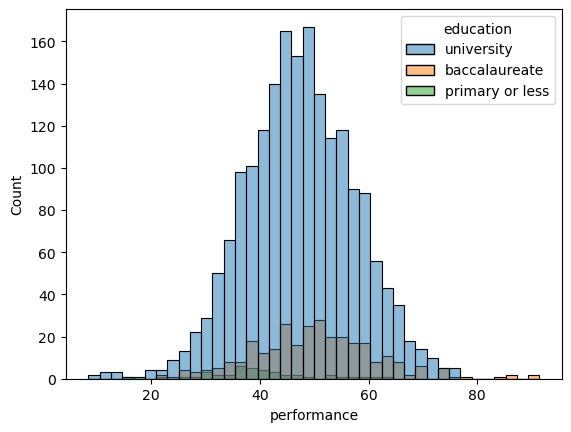

In [44]:
sns.histplot(x = 'performance', hue = 'education', data = data)

<AxesSubplot: xlabel='occurrence_mental', ylabel='Count'>

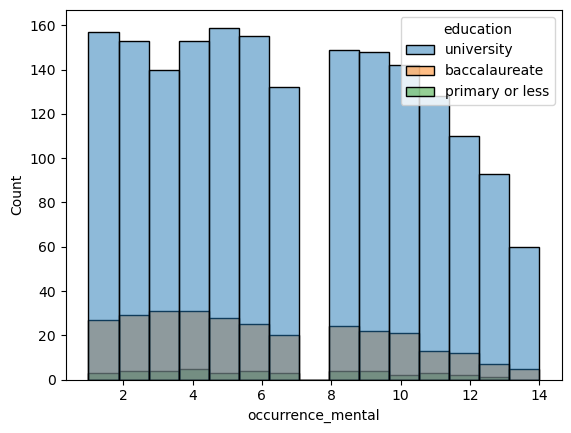

In [208]:
sns.histplot(x = 'occurrence_mental', hue = 'education', data = data)

<AxesSubplot: xlabel='stress', ylabel='Count'>

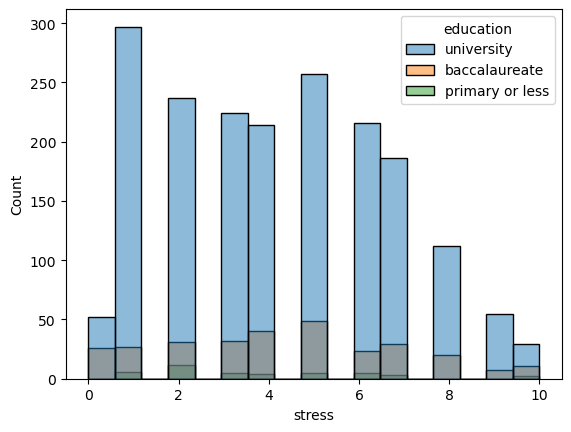

In [209]:
sns.histplot(x = 'stress', hue = 'education', data = data)

<AxesSubplot: xlabel='education', ylabel='stress'>

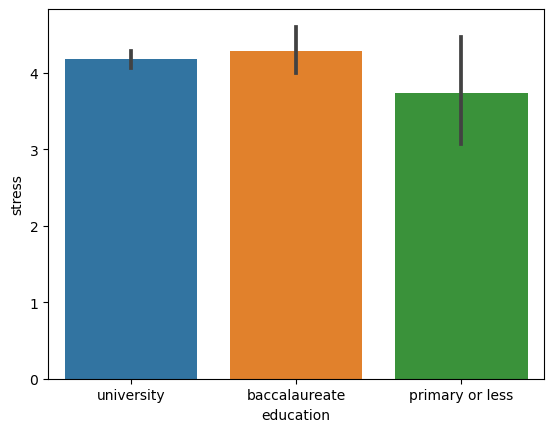

In [56]:
sns.barplot(x = 'education', y = 'stress', data = data)

<AxesSubplot: xlabel='education', ylabel='occurrence_mental'>

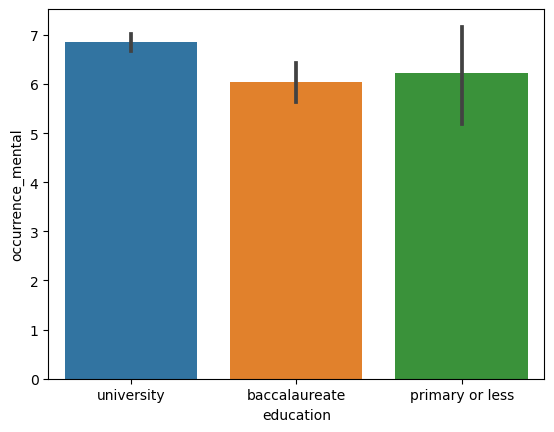

In [55]:
sns.barplot(x = 'education', y = 'occurrence_mental', data = data)

<AxesSubplot: xlabel='education', ylabel='performance'>

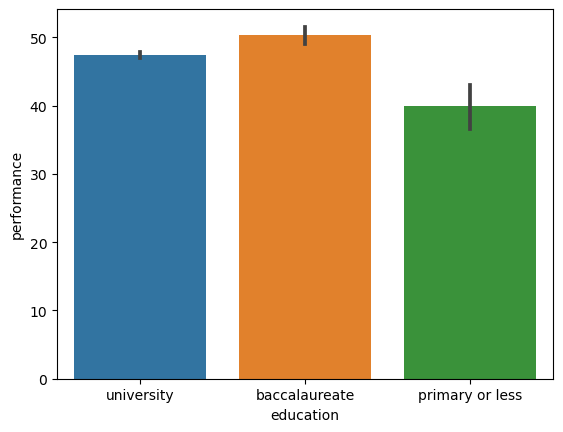

In [58]:
sns.barplot(x = 'education', y = 'performance', data = data)

<AxesSubplot: xlabel='stress', ylabel='performance'>

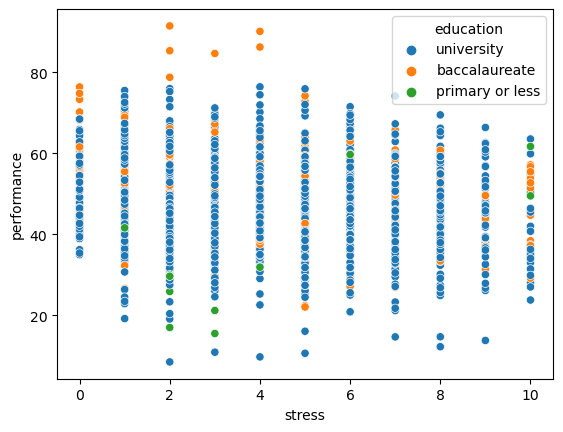

In [229]:
sns.scatterplot(x = 'stress', y = 'performance', hue = 'education', data = data)

<AxesSubplot: xlabel='occurrence_mental', ylabel='performance'>

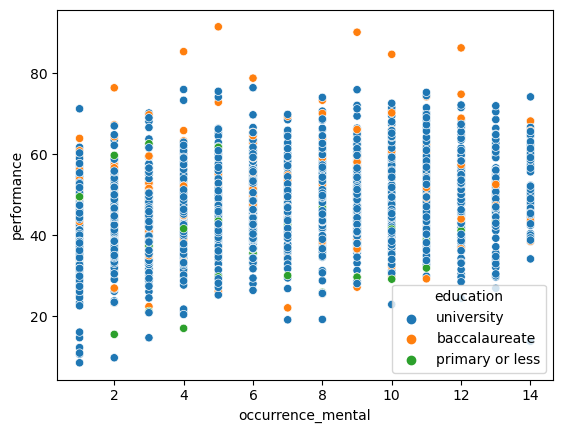

In [230]:
sns.scatterplot(x = 'occurrence_mental', y = 'performance', hue = 'education', data = data)

In [220]:
average_mental_health_issue_occurence_univ = np.mean(data[data['education'] == 'university']['occurrence_mental'])
average_mental_health_issue_occurence_bac = np.mean(data[data['education'] == 'baccalaureate']['occurrence_mental'])
average_mental_health_issue_occurence_pri_less = np.mean(data[data['education'] == 'primary or less']['occurrence_mental'])

print('Average Mental Health Issue Occurence for people with University education is {:0.3f}'.format(average_mental_health_issue_occurence_univ))
print('Average Mental Health Issue Occurence for people with Baccalaureate education is {:0.3f}'.format(average_mental_health_issue_occurence_bac))
print('Average Mental Health Issue Occurence for people with Primary or less education is {:0.3f}'.format(average_mental_health_issue_occurence_pri_less))

Average Mental Health Issue Occurence for people with University education is 6.847
Average Mental Health Issue Occurence for people with Baccalaureate education is 6.034
Average Mental Health Issue Occurence for people with Primary or less education is 6.214


In [221]:
average_stress_univ = np.mean(data[data['education'] == 'university']['stress'])
average_stress_bac = np.mean(data[data['education'] == 'baccalaureate']['stress'])
average_stress_pri_less = np.mean(data[data['education'] == 'primary or less']['stress'])

print('Average Stress Level for people with University education is {:0.3f}'.format(average_stress_univ))
print('Average Stress Level for people with Baccalaureate education is {:0.3f}'.format(average_stress_bac))
print('Average Stress Level for people with Primary or less education is {:0.3f}'.format(average_stress_pri_less))

Average Stress Level for people with University education is 4.185
Average Stress Level for people with Baccalaureate education is 4.285
Average Stress Level for people with Primary or less education is 3.738


In [222]:
average_performance_univ = np.mean(data[data['education'] == 'university']['performance'])
average_performance_bac = np.mean(data[data['education'] == 'baccalaureate']['performance'])
average_performance_pri_less = np.mean(data[data['education'] == 'primary or less']['performance'])

print('Average Stroop Test score for people with University education is {:0.3f}'.format(average_performance_univ))
print('Average Stroop Test score for people with Baccalaureate education is {:0.3f}'.format(average_performance_bac))
print('Average Stroop Test score for people with Primary or less education is {:0.3f}'.format(average_performance_pri_less))

Average Stroop Test score for people with University education is 47.408
Average Stroop Test score for people with Baccalaureate education is 50.281
Average Stroop Test score for people with Primary or less education is 39.928


In [210]:
def hypothesis_testing(educ1, educ2, column, data, observed_diff, cutoff):
    diffs = []
    for i in np.arange(20000):
        data['shuffled_education'] = data['education'].sample(frac = 1, replace = False).values
        diff = np.abs(np.mean(data[data['shuffled_education'] == educ1][column]) - np.mean(data[data['shuffled_education'] == educ2][column]))
        diffs += [diff]
        data = data.drop(['shuffled_education'], axis = 1)
        
    pvalue = sum(observed_diff <= diffs) / len(diffs)
    if pvalue <= cutoff:
        print('P value is {:0.3f}'.format(pvalue) + '.' + ' ' + 'Thus, Reject the Null Hypothesis')
    else:
        print('P value is {:0.3f}'.format(pvalue) + '.' + ' ' + 'Thus, Fail to Rejct the Null Hypothesis')

In [211]:
observed_diff = np.abs(average_mental_health_issue_occurence_univ - average_mental_health_issue_occurence_bac)
hypothesis_testing('university', 'baccalaureate', 'occurrence_mental', data, observed_diff, 0.05)

P value is 0.001. Thus, Reject the Null Hypothesis


In [212]:
observed_diff = np.abs(average_mental_health_issue_occurence_univ - average_mental_health_issue_occurence_pri_less)
hypothesis_testing('university', 'primary or less', 'occurrence_mental', data, observed_diff, 0.05)

P value is 0.279. Thus, Fail to Rejct the Null Hypothesis


In [213]:
observed_diff = np.abs(average_mental_health_issue_occurence_bac - average_mental_health_issue_occurence_pri_less)
hypothesis_testing('baccalaureate', 'primary or less', 'occurrence_mental', data, observed_diff, 0.05)

P value is 0.770. Thus, Fail to Rejct the Null Hypothesis


In [214]:
observed_diff = np.abs(average_stress_univ - average_stress_bac)
hypothesis_testing('university', 'baccalaureate', 'stress', data, observed_diff, 0.05)

P value is 0.526. Thus, Fail to Rejct the Null Hypothesis


In [215]:
observed_diff = np.abs(average_stress_univ - average_stress_pri_less)
hypothesis_testing('university', 'primary or less', 'stress', data, observed_diff, 0.05)

P value is 0.255. Thus, Fail to Rejct the Null Hypothesis


In [216]:
observed_diff = np.abs(average_stress_pri_less - average_stress_bac)
hypothesis_testing('primary or less', 'baccalaureate', 'stress', data, observed_diff, 0.05)

P value is 0.183. Thus, Fail to Rejct the Null Hypothesis


In [217]:
observed_diff = np.abs(average_performance_univ - average_performance_bac)
hypothesis_testing('university', 'baccalaureate', 'performance', data, observed_diff, 0.05)

P value is 0.000. Thus, Reject the Null Hypothesis


In [218]:
observed_diff = np.abs(average_performance_univ - average_performance_pri_less)
hypothesis_testing('university', 'primary or less', 'performance', data, observed_diff, 0.05)

P value is 0.000. Thus, Reject the Null Hypothesis


In [219]:
observed_diff = np.abs(average_performance_bac - average_performance_pri_less)
hypothesis_testing('baccalaureate', 'primary or less', 'performance', data, observed_diff, 0.05)

P value is 0.000. Thus, Reject the Null Hypothesis
